In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
DATADIR = r"/content/drive/MyDrive/deep learning/images"
categories = ["mattar_paneer","beetroot_halwa","bhindi_fry", "chicken_biryani", "chicken_lollipop",
              "dal_makhani", "egg_burji", "jalebi", "jeera_aloo", "kaju_katli", 
              "palak_paneer", "Parotta", "poori", "rasgulla", "vada"]
training_data = []
def create_train():
    for cat in categories:
        path = os.path.join(DATADIR,cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_a = load_img(os.path.join(DATADIR,cat,img))
                img_array = img_to_array(img_a)
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
create_train()

In [ ]:
X = []
y = []
for feat,label in training_data:
    X.append(feat)
    y.append(label)
X = np.array(X)
X/=255
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

In [ ]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(200, 200, 3)),
    layers.experimental.preprocessing.RandomRotation((-0.2, 0.3)),
])

rescale_ = models.Sequential([
    layers.experimental.preprocessing.Resizing(200, 200, input_shape=[None,None,3]),
])

lossFN = 'sparse_categorical_crossentropy'
optimizerFN = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn = models.Sequential([

    rescale_,

    data_augmentation,
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.3),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.35),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),

    layers.Dropout(0.3),

    layers.Dense(256,activation = 'relu'),

    layers.Dropout(0.2),

    layers.Dense(64,activation = 'relu'),
    
    layers.Dense(15, activation='softmax')
])
cnn.compile(optimizer=optimizerFN,
              loss= lossFN,
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train,y_train,batch_size = 32, validation_split = 0.05, epochs=98)

Epoch 1/98
73/73 [==============================] - 16s 86ms/step - loss: 2.7670 - accuracy: 0.0719 - val_loss: 2.5590 - val_accuracy: 0.0976
Epoch 2/98
73/73 [==============================] - 6s 80ms/step - loss: 2.4225 - accuracy: 0.1828 - val_loss: 2.1235 - val_accuracy: 0.2602
Epoch 3/98
73/73 [==============================] - 6s 79ms/step - loss: 2.0986 - accuracy: 0.2800 - val_loss: 2.0139 - val_accuracy: 0.3008
Epoch 4/98
73/73 [==============================] - 8s 111ms/step - loss: 1.8945 - accuracy: 0.3365 - val_loss: 1.8026 - val_accuracy: 0.3577
Epoch 5/98
73/73 [==============================] - 6s 87ms/step - loss: 1.8253 - accuracy: 0.3647 - val_loss: 1.7340 - val_accuracy: 0.4553
Epoch 6/98
73/73 [==============================] - 6s 79ms/step - loss: 1.7357 - accuracy: 0.3990 - val_loss: 1.6469 - val_accuracy: 0.4065
Epoch 7/98
73/73 [==============================] - 8s 110ms/step - loss: 1.6434 - accuracy: 0.4401 - val_loss: 1.5311 - val_accuracy: 0.4797
Epoch 8/98

In [ ]:
cnn.evaluate(X_train, y_train)

77/77 [==============================] - 2s 27ms/step - loss: 0.3985 - accuracy: 0.8613


[0.39851170778274536, 0.861325740814209]

In [ ]:
cnn.evaluate(X_test, y_test)

14/14 [==============================] - 1s 44ms/step - loss: 1.4219 - accuracy: 0.6336


[1.4219321012496948, 0.6336405277252197]

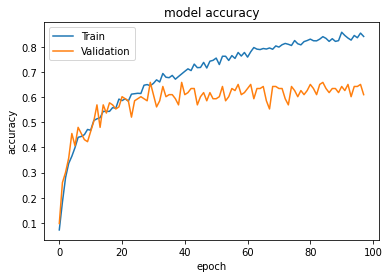

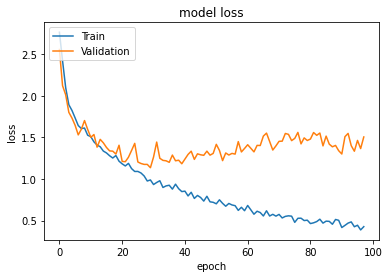

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

14/14 [==============================] - 0s 23ms/step
0.6268290689891819


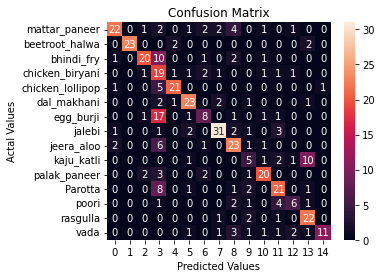

Values of:  mattar_paneer
precision:  0.8148148148148148
recall:  0.6111111111111112
f-score:  0.6984126984126984
support 36
i = 0
Values of:  beetroot_halwa
precision:  1.0
recall:  0.8518518518518519
f-score:  0.92
support 27
i = 1
Values of:  bhindi_fry
precision:  0.8
recall:  0.5714285714285714
f-score:  0.6666666666666666
support 35
i = 2
Values of:  chicken_biryani
precision:  0.25675675675675674
recall:  0.6785714285714286
f-score:  0.37254901960784315
support 28
i = 3
Values of:  chicken_lollipop
precision:  0.84
recall:  0.75
f-score:  0.7924528301886793
support 28
i = 4
Values of:  dal_makhani
precision:  0.7419354838709677
recall:  0.7666666666666667
f-score:  0.7540983606557377
support 30
i = 5
Values of:  egg_burji
precision:  0.5
recall:  0.26666666666666666
f-score:  0.3478260869565218
support 30
i = 6
Values of:  jalebi
precision:  0.8157894736842105
recall:  0.7560975609756098
f-score:  0.7848101265822786
support 41
i = 7
Values of:  jeera_aloo
precision:  0.605263157

In [ ]:
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd
import seaborn as sns

y_pred = np.argmax(cnn.predict(X_test), axis=-1)

print(f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=categories)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
for i in range(len(categories)):
  print("Values of: ", categories[i])
  print("precision: ",precision_recall_fscore_support(y_test, y_pred)[0][i])
  print("recall: ",precision_recall_fscore_support(y_test, y_pred)[1][i])
  print("f-score: ", precision_recall_fscore_support(y_test, y_pred)[2][i])
  print("support", precision_recall_fscore_support(y_test, y_pred)[3][i])
  print("i =",i)
  print("="*10)